# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlchecks.checks.leakage import *
from mlchecks.base import Dataset

# Generating data:

In [2]:
df = pd.DataFrame(np.random.randn(100, 3), columns=['x1', 'x2', 'x3'])
df['x4'] = df['x1'] * 0.5 + df['x2']
df['label'] = df['x2'] + 0.1 * df['x1']
df['x5'] = df['label'].apply(lambda x: 'v1' if x < 0 else 'v2')


In [3]:
ds = Dataset(df, label='label')

c:\users\nirhu\documents\deepchecks\mlchecks\mlchecks\base\dataset.py:57: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._features = [x for x in df.columns if x not in {label, index, date}]
c:\users\nirhu\documents\deepchecks\mlchecks\mlchecks\base\dataset.py:67: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._cat_features = self.infer_categorical_features()


# Running single_feature_contribution check:

{'x2': 0.8389718836808199, 'x4': 0.45258261206515027, 'x5': 0.4019643507267485, 'x1': 0.0, 'x3': 0.0}

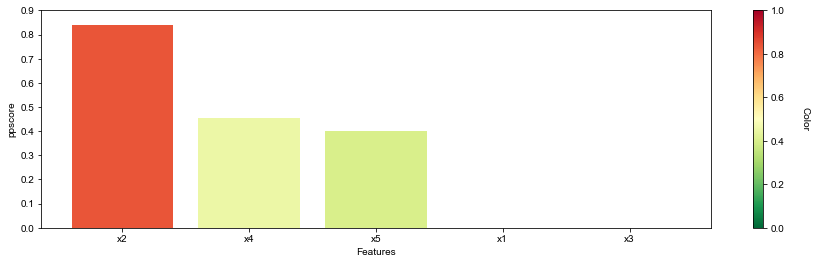

In [4]:
single_feature_contribution(ds)

# Using the SingleFeatureContribution check class:

{'x2': 0.7081732919411242, 'x5': 0.4811583413073032, 'x4': 0.14010696622727759, 'x1': 0.0, 'x3': 0.0}

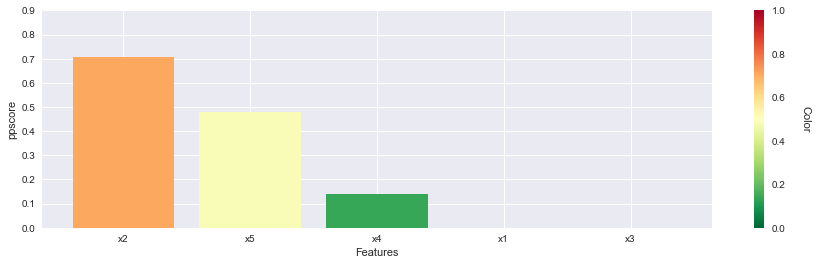

In [5]:
my_check = SingleFeatureContribution(ppscore_params={'sample': 10})
my_check.run(dataset=ds)

# Generating data:

In [6]:
df_validation = df.copy()
df_validation['x2'] = df['x2'] + 0.5 * df['x1']
df_validation['x3'] = 0.3 * df['x3'] + df['label']


In [7]:
ds_validation = Dataset(df_validation, label='label')

c:\users\nirhu\documents\deepchecks\mlchecks\mlchecks\base\dataset.py:57: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._features = [x for x in df.columns if x not in {label, index, date}]
c:\users\nirhu\documents\deepchecks\mlchecks\mlchecks\base\dataset.py:67: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._cat_features = self.infer_categorical_features()


# Running single_feature_contribution check:

{'x1': 0.0, 'x2': 0.3863892716156696, 'x3': 0.0, 'x4': 0.0, 'x5': 0.0}

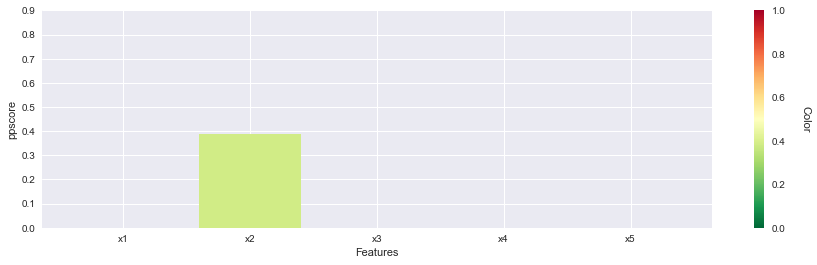

In [8]:
single_feature_contribution_train_validation(train_dataset=ds, validation_dataset=ds_validation)

# Using the SingleFeatureContribution check class:

{'x1': 0.0, 'x2': 0.5680663257138466, 'x3': 0.0, 'x4': 0.0, 'x5': 0.0}

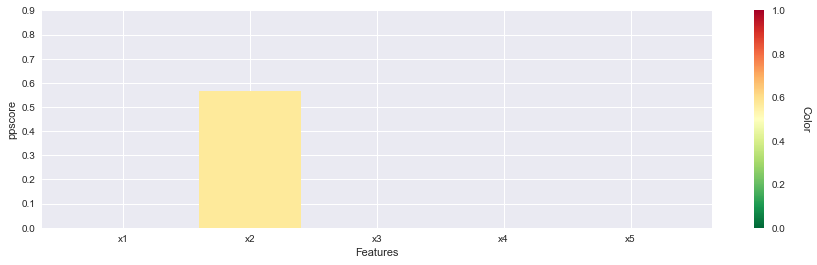

In [9]:
my_check = SingleFeatureContributionTrainValidation(ppscore_params={'sample': 10})
my_check.run(train_dataset=ds, validation_dataset=ds_validation)